In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='training',
                                               target_size=(100, 100))

valid_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='validation',
                                               target_size=(100, 100))

test_data = train_datagen.flow_from_directory('data/test',
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=256,
                                              target_size=(100, 100))

Found 3161 images belonging to 10 classes.
Found 349 images belonging to 10 classes.
Found 1170 images belonging to 10 classes.


In [3]:
train_data.class_indices

{'Apple 5': 0,
 'Apricot 1': 1,
 'Avocado 1': 2,
 'Banana 3': 3,
 'Beans 1': 4,
 'Blackberrie 1': 5,
 'Cabbage white 1': 6,
 'Cactus fruit 1': 7,
 'Carrot 1': 8,
 'Corn 1': 9}

In [4]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.summary()

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,888 (148.00 KB)

 Trainable params: 37,888 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=valid_data, epochs=8)

/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.3217 - loss: 2.0987 - val_accuracy: 0.6705 - val_loss: 1.1548
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6691 - loss: 0.8485 - val_accuracy: 0.8596 - val_loss: 0.4425
Epoch 3/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8127 - loss: 0.3744 - val_accuracy: 0.8682 - val_loss: 0.1076
Epoch 4/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8146 - loss: 0.1480 - val_accuracy: 0.8596 - val_loss: 0.0586
Epoch 5/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7776 - loss: 0.0766 - val_accuracy: 0.8395 - val_loss: 0.0191
Epoch 6/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7865 - loss: 0.0541 - val_accuracy: 0.8539 - val_loss: 0.0129
Epoch 7/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7735 - loss: 0.0363 - val_accuracy: 0.8539 - val_loss: 0.0140
Epoch 8/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7513 - loss: 0.0461 - val_accuracy: 0.8481 - val_loss: 0.0060


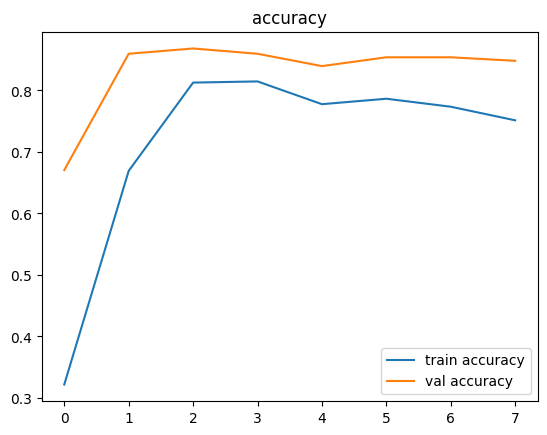

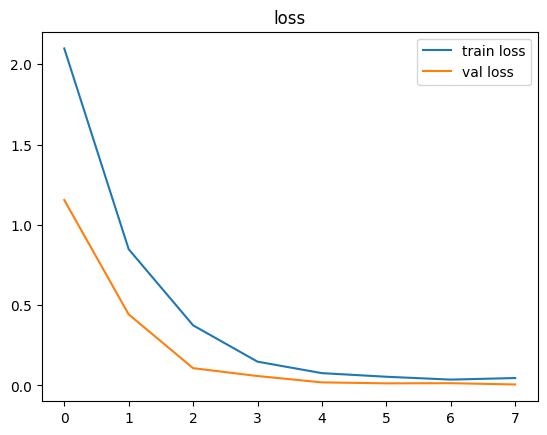

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.legend()
plt.show()

In [8]:
loss, accuracy = model.evaluate(test_data)
print(accuracy * 100)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 753ms/step - accuracy: 0.7103 - loss: 0.0483
71.02563977241516


In [9]:
model.save('models/simple-cnn-84.h5')